осталась 2.1.2.b, 2.2, 3.3

# Problem set 2 (99 pts)

## Important information

1. We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2. Please submit the single Jupyter Notebook file, where only Python and Markdown/$\LaTeX$
 are used. Any hand-written solutions inserted by photos or in any other way are prohibitive and will not be graded. If you will have any questions about using Markdown, ask them!

3. The works will be checked for plagiarism. The score will be divided by the number of similar works.

# Problem 1 (44 pts)

Commonly enough the matrices arising in discretisations of particular problems are not just sparse, but also possess the *banded* property i.e. a general element of $A$ be $a_{ij}$, we say that it has an *upper bandwith* of $u$ and a *lower bandwith* of $l$ iff it may only nonzero between $l$-th and $u$-th main diagonals (in other words, $a_{ij}$ may only be nonzero when $i\le j+l$ and $j\le i+ u$).
In particular, any upper triangular matrix of size $n\times n$ has a lower bandwith of 1 and an upper bandwith of $n$.
The goal of this task is to endow you with some understanding of this important matrix class. Keep in mind that vectors are column.

1) (1 pts) Assume you are given a dyadic matrix $xy^T$. Suppose that only $a$ leading components of $x$ and $b$ leading components of $y$ are nonzero. What are the bandwiths of this matrix?


2) (3 pts) Assume you are given a banded matrix $A\in\mathbb{R}^{n\times n}$ with bandwiths $l$ and $u$. Examine the bandwidths of its $L$ and $U$ factors in LU decomposition, assuming its existence. Assume that the diagonal is nonzero for simplicity of the proof.

3) (3 pts) Assume we also perform pivoting in computing PLU decomposition, so that $A\ne LU$, but rather $PA = LU$. Examine the upper bandwidth of $U$.


4) (7 pts) Based on the intuition gained so far, propose and implement an LU algorithm for banded matrices specifically. Estimate the leading term in the complexity analysis. Pivoting is not needed.


5) (5 pts) Specify the above algorithm to tridiagonal matrices. Implement it and estimate complexity.


6) (10 pts) Since we are dealing with direct inversions, we would also like to know how the banded matrices invert. In particular, we would like to know if we can say something about inverses' structure. Show that the inverse of a banded matrix is a matrix with low-rank off-diagonal blocks and estimate the ranks thereof. Assume the matrix diagonal blocks nonsingular.

7) (10 pts) Finally, proof the following important fact, due to Strang: if both a matrix and its inverse are banded, then the matrix is a product of block diagonal factors; each factor is composed of $2\times2$ and $1\times1$ blocks, and the total number thereof is not dependent directly on the matrix dimension. Try to make it as convincing as you can.

8) (5 pts) Consider the inverse matrix of a banded matrix with the strcuture from task 7); consider also the transpose thereof. Show that they share bandwidths.

In [ ]:
# Your solution is here

In [ ]:
me

1) $(xy^T)_{ij} = x_iy_j$

$x_iy_j$ would be nonzero for $i \leq a$ and for $j \leq b$

So basically only the upper a x b block is nonzero and the upper and lower bandwith are respectfully a, b.


2) $A$ can be rewritten as
$$
A = \begin{bmatrix}a&b^T\\c&D\end{bmatrix}
$$

where $a$ is a scalar, $b, c \in \mathbb{R}^{n-1}$ and $D$ is a banded lower block

We can then perform Gausian elimination to get the LU decomposition

$$
A=LU
$$

$$
L=\begin{bmatrix}1&0\\\frac{c}{a}&I\end{bmatrix}
$$

$$
U=\begin{bmatrix}a&b^T\\0&D-\frac{cb^T}a\end{bmatrix}
$$


Given that the original matrix has bandwiths $l$ and $u$, $D$ also possesses the same bandwiths. Furthermore, both $b$ and $c$ have $u$ leading nonzero values and $l$ respectively. Hence the bandwiths of $D$ are equivalent to those of $A$.

Consequently, the upper bandwith of L and the lower bandwith of $U$ become zeroes. Additionally, due to the structure of $b$, the upper bandwith of $U$ is the same as that of $A$, whereas the lower bandwith of $L$ is solely determined by the number of nonzero values in $c$, which happens to be $l$. So $L$ has bandwith $(0, l)$ and $U$ has bandwith $(u, 0)$

3) To represent P, a stacked matrix of indicator row vectors can be utilized. Each element $p_{ij}$ indicates whether the j-th row is placed in the i-th position. Consider $idx[p_i]$ as the index of the element that is present in a specific row.

It is noteworthy that $(PA)_{ij}$ is equal to $A_{idx[p_i];j}$ according to the definition. If $idx[p_i]$ is greater than $j + l$, it can be observed that this value becomes zero. However, it is impossible for $idx[p_s]$ to surpass $s + l$ for any $s$ since it would imply that a principal minor of size $s$ in $PA$ becomes singular, rendering the entire matrix singular as well.

Therefore, we can conclude that $idx[p_s]$ is less than or equal to $s + l$. Consequently, based on the definition, the upper bandwidth of $PA$ is enhanced by $l$ as a shift of at most $l$ is feasible where the rightmost diagonal represents the u-th element. As a result, the upper bandwidth of $U$ is also identical, namely $u + l$.


4) To get LU decomposition of banded matrix we can perform the regular Gaussian elimination, but skip unnecessary steps by only iterating until the minimum between $n$ and the band boundary.
At each step we need to do at most $lu$ multiplications and additions. So complexity of LU decomposition of banded matrix will be $2nlu$ rather than $\frac{2}{3}n^3$

In [ ]:
import numpy as np

def lu_decomposition_banded(A, l, u):
    n = A.shape[0]
    U = np.copy(A)
    L = np.eye(n, dtype=np.double)

    for k in range(n):
        for i in range(k+1, min(k+l+1, n)):
            factor = U[i, k] / U[k, k]
            L[i, k] = factor
            for j in range(k, min(k+u+1, n)):
                U[i, j] -= factor * U[k, j]
    return L, U

# Test the function
A = np.array([[7, 3, 0, 0], [3, 8, 1, 0], [0, 1, 4, -1], [0, 0, -1, 6]], dtype=np.float64)
l = 2  # lower bandwidth
u = 2  # upper bandwidth
L, U = lu_decomposition_banded(A, l, u)

print("L:")
print(L)
print("U:")
print(U)
tolerance = 1e-10
if np.allclose(A, L@U, atol=tolerance):
    print("LU is close enough to A")


L:
[[ 1.          0.          0.          0.        ]
 [ 0.42857143  1.          0.          0.        ]
 [ 0.          0.14893617  1.          0.        ]
 [ 0.          0.         -0.25966851  1.        ]]
U:
[[ 7.          3.          0.          0.        ]
 [ 0.          6.71428571  1.          0.        ]
 [ 0.          0.          3.85106383 -1.        ]
 [ 0.          0.          0.          5.74033149]]
[[ 7.  3.  0.  0.]
 [ 3.  8.  1.  0.]
 [ 0.  1.  4. -1.]
 [ 0.  0. -1.  6.]]
LU is close enough to A


5). Since tridiagonal matrix has lower bandwith = 2 and upper bandwith = 2. then complexity will be 8n.

In [ ]:
import numpy as np

def lu_decomposition_tridiagonal(A):
    n = len(A)
    L = np.zeros((n,n))
    U = np.copy(A)

    for i in range(n):
        L[i, i] = 1
        if i < n-1:
            factor = U[i+1, i] / U[i, i]
            L[i+1, i] = factor
            U[i+1, i] = 0
            U[i+1, i+1] = U[i+1, i+1] - factor * U[i, i+1]

    return L, U

# Test the function with a 4x4 tridiagonal matrix
A = np.array([[4, 1, 0, 0], [1, 4, 1, 0], [0, 1, 4, 1], [0, 0, 1, 4]], dtype=np.float64)
L, U = lu_decomposition_tridiagonal(A)

print("L:")
print(L)
print("U:")
print(U)
tolerance = 1e-10
if np.allclose(A, L@U, atol=tolerance):
    print("LU is close enough to A")


L:
[[1.         0.         0.         0.        ]
 [0.25       1.         0.         0.        ]
 [0.         0.26666667 1.         0.        ]
 [0.         0.         0.26785714 1.        ]]
U:
[[4.         1.         0.         0.        ]
 [0.         3.75       1.         0.        ]
 [0.         0.         3.73333333 1.        ]
 [0.         0.         0.         3.73214286]]
LU is close enough to A


6) If $A$ is a banded matrix with lower bandwith $l$ and upper bandwith $u$, and $B = A^{-1}$.

If we partition $A$, and $B$ into blocks $A_{ij}, B_{ij}$, then

$A_{10}B_{00} + A_{11}B_{10} = A_{00}B_{01} + A_{01}B_{11} = 0$

$⇒B_{01} = -A_{00}^{-1}A_{01}B_{11}$

By the question, assuming $A_{00}$ is non singular then $rank(B_{01}$ is less than or equal the most rank-deficient matrix which is $A_{01}$, which has rank at most $l$. Similar case for $B_{10}$

$rank(B) \leq rank(B_{10}) + rank(B_{01})$

$rank(B) \leq 2l$

7)
To prove this, we begin by performing elimination steps on the matrix A to make it diagonal. We focus on the case where both A and its inverse have a bandwidth of 2 (represented by W). The crucial consequence of this bandwidth is that all submatrices H and K of A, located below the Wth upper diagonal and above the Wth lower diagonal, have a rank of at most W.

We start the elimination process on the first 4 rows of A. We divide these rows into submatrices H1 and K1, each with a rank of at most W. Since A is invertible, these four rows must be independent, meaning that both H1 and K1 have a rank equal to W. The non-zero elements are marked with x and X, and the bandwidth is set to 2.

By applying row operations, we can introduce non-zero elements in the first two diagonal positions (X) of H1 while keeping zeros elsewhere in H1. As rows 3 and 4 of A remain independent, the new rows 3 and 4 of K1 must also be independent. Further row operations remove rows 1 and 2 of K1 without affecting H1. Then, by performing operations on columns 3, 4, 5, and 6 of A, we can introduce non-zero elements in the two diagonal positions (X) of K1 while maintaining zeros elsewhere.

We then proceed to rows 5-8 and repeat the same process. We create new submatrices H2 and K2, which must have a rank of W. The last two columns of H2 must be independent because they are now zero in K1. Using these columns, we can introduce zeros in the first two columns of H2 without affecting K1. This results in H2 and K2 being in the same situation as the original H1 and K1.

We continue this process on rows 5-8 of the current A and on columns 7-10, introducing non-zero elements only in the diagonal positions (X) of the matrices. All row operations are left multiplications by elimination matrices, which can be factored into products of the admissible Fs. The key observation is that operations on rows 1-4 and rows 5-8 can be carried out simultaneously using the same Fs. Similarly, column operations on A are right multiplications, and columns 3-6 can be modified in parallel with columns 7-10.

In summary, the proof demonstrates that by performing elimination steps on the matrix A, we can transform it into a block diagonal form consisting of 2×2 and 1×1 blocks. This decomposition is possible regardless of the matrix's dimension, and the number of blocks does not depend directly on the matrix size.


8) Since $A$ and $A^T$ will have the same bandwith and $(A^{-1})^T = (A^T)^{-1}$, then $A^T$ will be the transpose of the blocks and the inverse of the multiplication of these blocks will have the same bandwith as $A^{-1}$

# Problem 2. Stability of linear least squares (25 pts)

In this task you are supposed to explore the concept of the stability of the linear least squares problem.

So you are given a matrix $A \in \mathbf{R}^{n \times m}, n > m$, the right-hand side $b \in \mathbf{R}^{n}$. And you need to find the solution $x \in \mathbf{R}^{m}$ that minimizes the residual:

$$
\Vert A x - b \Vert_2 \rightarrow \min_x.
$$

### Task 1. Theory
For all tasks here you can use spectral norm for the computation of condition number.

1. (5 pts) Condition number of a matrix affects the stability of the solution. Recall from the lecture that using a normal equation $ A^* A x = A^* b $ to solve linear least squares problem is not a good idea.
Prove that $\mathrm{cond}_2(A^* A) = \mathrm{cond}_2(A)^2$.

2. (5 pts) Derive the condition number in 2-norm for
  
   a) unitary matrix,
   
   b) normal matrix,

   c) diagonal matrix.

### Task 2. Practice (15 pts)

In this task you need to compare the relative errors of solution produced by different approaches for solving linear least squares on ill-conditioned matrices.

1. Come up with the way to construct a random $n \times m$ matrix with given condition number. Implement it in `construct_random_matrix`.

2. You need to solve linear least squares problem using four ways:
   
   a) with normal equation;
   
   b) using QR decomposition;
   
   c) using pseudoinverse (compute it yourself using SVD);
   
   d) using bigger system of equations
   
   $$ \begin{pmatrix} 0 & A^* \\ A & -I \end{pmatrix} \begin{pmatrix} x \\ r \end{pmatrix} = \begin{pmatrix} 0 \\ b \end{pmatrix}, $$
   
    where $r = Ax - b$.

3. With the growth of condition number show the growth of the relative error $\frac{\Vert \hat{x} - x \Vert}{\Vert x \Vert}$ between the initial solution $x$ and the solution $\hat{x}$ of the perturbed system $Ax = b + \Delta b$. Show that for the normal equation the dependence is quadratic w.r.t condition number, while for the other methods it is linear. Plot the resulting dependence (error vs condition number) and comment on results. Ensure that your plots are interpretable.

4. In general, the setup of your experiment should be the following:
 - Generate a random matrix $A$ and a vector $x_\text{true}$.
 - Compute the correct right-hand side $b$.
 - Solve the resulting system $Ax = b$ to get $x$.
 - Perturb the system $Ax = b + \Delta b$ and get new solution $\hat{x}$. The perturbation $\frac{\Vert \Delta b \Vert}{\Vert b \Vert}$ should be small.

You are free to use `numpy` or `jax`.

### Task 1 ###

$$cond(A) = \|A\|\|A^{-1}\|$$

$cond_2(A) =\|A\|_2\|A^{-1}\|_2 = \sqrt{λ_{max}(A^*A}) \sqrt{λ_{max}((A^{-1})^*A^{-1})} =  \sqrt{λ_{max}(A^*A}) \sqrt{λ_{max}((A^*)^{-1}A^{-1})} = \sqrt{λ_{max}(A^*A}) \sqrt{λ_{max}((AA^*)^{-1})}$

Eigenvalues of $(AA^*)^{-1}$ are just reciprocals of eigenvalues of $(AA^*)$, which can easily be seen from spectral decomposition.

Therefore $λ_{max}((AA^*)^{-1}) = 1/ λ_{min}((AA^*)) = 1/λ_{min}((A^*A)) ⇒$

$cond_2(A) = \sqrt{λ_{max}(A^*A}) \sqrt{1/λ_{min}((A^*A))}$

$$= \sqrt{\frac{\lambda_{max}(A^*A)}{\lambda_{min}(A^*A)}}$$




1) By SVD, let $A = UΣV^*$ and $A^* = VΣU^*$

$A^*A = UΣ^2U^*$ where $Σ^2$ are eigenvalues of $A^*A$

$(A^*A)^2 = UΣ^4U^*$. Therefore $\lambda_i((A^*A)^2) = \lambda_i(A^*A)^2$

$$cond_2(A) = \sqrt{\frac{\lambda_{max}(A^*A)}{\lambda_{min}(A^*A)}} ⇒$$

$$cond_2(A^*A) = \sqrt{\frac{\lambda_{max}((A^*A)^2)}{\lambda_{min}((A^*A)^2)}} = \sqrt{\frac{ \lambda_{max}(A^*A)^2}{ \lambda_{min}(A^*A)^2}} = \sqrt{\left(\frac{\lambda_{max}(A^*A)}{\lambda_{min}(A^*A)}\right)^2}$$
eigenvalues of $A^*A$ are positive so

$=\left(\sqrt{\frac{\lambda_{max}(A^*A)}{\lambda_{min}(A^*A)}}\right)^2 = cond_2(A)^2$

2a) If A is unitary $⇒ A^{*}A = I$

$$cond_2(A) = \sqrt{\frac{\lambda_{max}(A^*A)}{\lambda_{min}(A^*A)}} =  \sqrt{\frac{\lambda_{max}(I)}{\lambda_{min}(I)}} = 1$$


2b) If A is normal $⇒ A = UΛU^*$, where $U$ is unitary and $Λ$ are it's eigenvalues.

Then $A^*A = U\Lambda ^2U^*$, and $A^*A$ eigenvalues are eigenvalues of $A$ squared.

$cond_2(A) = \sqrt{\frac{λ_{max}(A^*A)}{λ_{min}(A^*A)}} = \sqrt{\frac{λ_{max}(A)^2}{λ_{min}(A)^2}} = \frac{|λ_{max}(A)|}{|λ_{min}(A)|}$

2c) Let $A$ be diagonal

$cond_2(A) = \sqrt{\frac{\lambda_{max}(A^*A)}{\lambda_{min}(A^*A)}} = \sqrt{\frac{λ_{max}(A)^2}{λ_{min}(A)^2}} = \frac{|λ_{max}(A)|}{|λ_{min}(A)|} = \frac{|max(A_{ii})|}{|min(A_{ii})|} $

In [1]:
import numpy as np


def construct_random_matrix(n: int, m: int, cond_number: float):
    """
    Constructs random nxm matrix with a given condition matrix.

    Args:
        n, m: matrix dimensions
        cond_number: the desired condition numebr

    Returns: nxm matrix with condition number cond_number
    """
    # Your solution here
    A = np.random.rand(n, m)
    U, s, Vt = np.linalg.svd(A)
    s = np.linspace(cond_number, 1, num=min(n, m))
    S = np.zeros((n, m))
    S[:min(n, m), :min(n, m)] = np.diag(s)
    A = U @ S @ Vt
    return A



n = 100
m = 40
cond_number = np.random.random() * 1000

assert np.allclose(np.linalg.cond(construct_random_matrix(n, m, cond_number)), cond_number)

In [9]:
from scipy.linalg import solve_triangular

def relative_error(x_hat, x_true):
    return np.linalg.norm(x_hat - x_true) / np.linalg.norm(x_true)

def perturbation_vector(b, delta=1e-5):
    max_norm = delta * np.linalg.norm(b)
    max_value = (max_norm**2 / b.shape[0])**0.5
    sign_vector = np.random.choice(np.array([1, -1]), size=b.shape[0])
    return sign_vector*np.array([max_value] * b.shape[0])

def normal_equation(X, y):
    LHS = X.T@X
    RHS = X.T@y
    theta = np.linalg.solve(LHS, RHS)
    # theta = np.linalg.inv(LHS) @ RHS
    return theta

def QR(X, y):
    Q, R = np.linalg.qr(X)
    tosolve = Q.T@y
    theta = solve_triangular(R, tosolve)
    return theta


def pseudo_inverse(X, y):
    U, s, Vt = np.linalg.svd(X)
    s_inv = 1/s
    S_inv = np.zeros((X.shape[0], X.shape[1])).T
    S_inv[:X.shape[1], :X.shape[1]] = np.diag(s_inv)
    return Vt.T@S_inv@U.T@y


def block(X, y):
    zeros = np.zeros((m, m))
    I = -np.eye(n)
    system = np.block([[zeros, X.T], [X, I]])
    resolve = np.block([np.zeros((m,)), y])
    return (np.linalg.inv(system)@resolve)[:m]



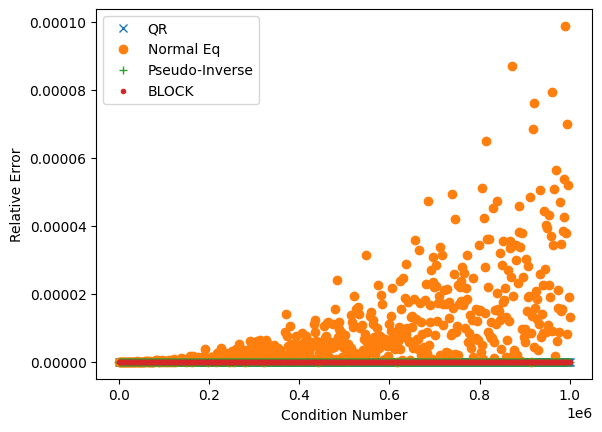

In [18]:
import matplotlib.pyplot as plt
from functools import partial

QR_error = list()
normal_eq_error = list()
pseudo_error = list()
block_error = list()

cond_numbers = np.linspace(1, int(1e6), 600)
updated_list = []
stop = 0

m = int(np.random.randint(40, 60))
n = m + int(np.random.randint(20, 100))
for index, cond_number in enumerate(cond_numbers):
    A = construct_random_matrix(n, m, cond_number)
    x_true = np.random.rand(m)
    b_true = A.dot(x_true)
    b = b_true + perturbation_vector(b_true, 1e-13)

    try:
        normal_eq_error.append(relative_error(normal_equation(A, b), x_true))
        QR_error.append(relative_error(QR(A, b), x_true))
        pseudo_error.append(relative_error(pseudo_inverse(A, b), x_true))
        block_error.append(relative_error(block(A, b), x_true))

    except (ValueError, np.linalg.LinAlgError) as e:
        updated_list = updated_list + list(cond_numbers[stop: index])
        stop = index + 1

if len(updated_list) == 0:
    updated_list = cond_numbers
else:
    updated_list = updated_list + list(cond_numbers[stop:])

plt.xlabel("Condition Number")
plt.ylabel("Relative Error")
plt.plot(updated_list, QR_error, 'x', label="QR")
plt.plot(updated_list, normal_eq_error, 'o', label="Normal Eq")
plt.plot(updated_list, pseudo_error, '+', label="Pseudo-Inverse")
plt.plot(updated_list, block_error, '.', label="BLOCK")
plt.legend()
plt.show()

# Problem 3 (30 pts)

A generalisation of the eigenvalue problem is the generalised eigenvalue problem; if an eigenpair satisfies
$$ Av = \lambda v,$$
then a generalised eigenvalue for a pair $(A,B)$ of matrices makes the matrix
$$A-\lambda B$$
degenerate.
The generalised eigenvector satisfies $Av = \lambda Bv$. In this task we consider matrices $A,B$ are of size  $n\times n$.

## Task 1 (4 pts)

How many generalised eigenvalues are there for each of the following matrix pairs? Find all, if you can:

  1. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 \\ 0& 1 \end{bmatrix} $$

  2. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 \\ 0& 0 \end{bmatrix} $$
  
  3. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 0 & 1 \\ 0& 0 \end{bmatrix} $$
  
  4. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 0 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 \\ 0& 0 \end{bmatrix} $$

## Task 2 (2 pts)

Assume $\mu$ is not a generalised eigenvalue of $(A,B)$. How are spectra of $(A,B)$ and $((A-\mu B)^{-1}A,(A-\mu B)^{-1}B)$ related?

## Task 3 (24 pts)

To solve the complete generalised eigenvalue problem, [QZ algorithm](https://link.springer.com/content/pdf/10.1007/3-540-28502-4_2) can be used. This algorithm is the direct generalization of the QR algorithm for the standard eigenvalue problem.
However, in this task we focus on the partial generalised eigenvalue problem and its application to the canonical correlation analysis.

You can test the algorithms in the further tasks only for the symmetric matrices $A$ and symmetric positive definite matrices $B$.

### From power method to its generalisation form

In order to recover the largest generalised eigenvalue and the corresponding eigenvector, one can note that

$$Av = \lambda Bv$$

is equivalent to

$$B^{-1}Av = \lambda v.$$

Therefore, one has to use the power method to $B^{-1}A$ with a random initialisation.
However, it may be rather expensive to invert $B$ explicitly.
Therefore, we would like to avoid doing that and inexactly apply $B^{-1}$ through the solving linear system $Bx = y$.
Implement the resulting algorithm based on this idea, verify its convergence speed and check that the generalised eigenvalue relation holds.

Important notes that will help you successfully update the classical power method:

1) think about how the normalization step should be changed, the energy norm definition $\|x\|^2_A = x^\top A x$ can help in the proper reformultation

2) think how the step $x_{k+1}= Ax_k$ will be updated with the aforementioned notes regarding operations with matrix $B$

### From *block* power method to its generalisation form

Just as in the regular eigenvalue case, generalised eigenvalues can be extended to block power method (which can yield the QZ algoritm, analogously to emergence of QR in the regular case).
The extension is straightforward and consists of replacing vectors with matrices corresponding to the $k$ largest  generalised eigenvectors.
Moreover, since orthogonality is reqiored, a routine for enforcing orthogonality of the iterates is also needed. Implement the block power method for the generalised eigenvalue problem.
Pay special attention how the orthogonalisation procedure shown be changed to take into account the matrix $B$.
Separately implement the proper orthoghonalisation algorithm and use it in your code for the target block power method.
Test convergence speed and check that results satisfy the target equation.

In addition, you can check the correctness of your result with ```scipy.linalg.eigh``` function with proper argumets.

### Application of the generalised eignevalue problem to the canonical correlation analysis

When one studies two datasets, it may be desirable to find the orthogonal (in the sense of the inner products induced by the correlation matrices) bases of spaces that capture linear combinations of features that are most correlated between the two datasets.
Such a problem is called the problem of **canonical correlation analysis** and can be formulated as finding such a sequence $\{(\phi_i, \psi_i)\}$ that for data matrices $X\in\mathbb{R}^{n\times a}, Y\in\mathbb{R}^{n\times b}$

$$(\phi_i, \psi_i)\in \arg\max_{\phi, \psi} \phi^TS_{xy}\psi$$

Subject to:

$$\|\phi\|_{S_x} = \|\psi\|_{S_y} = 1$$

$$\langle\phi, \phi_j\rangle_{S_x} = 0 \quad \forall j<i$$


$$\langle\psi, \psi_j\rangle_{S_y} = 0 \quad \forall j<i,$$

where $\|\cdot\|_A$ is the energy norm induced by $A$, $\langle\cdot,\cdot\rangle_A$ is the inner product induced by $A$, $S_y = \frac{1}{n}Y^\top Y$, $S_x = \frac{1}{n}X^\top X$, $S_{xy} = \frac{1}{n}X^\top Y$

We are asked to find two bases of the maximal-cross-correlation subspace, both orthogonal in the inner product induced by the correlation matrix of the appropriate dataset.

Consider firstly the problem of simply finding a basis of the described space, subject only to unit-vector conditions (since orthogonalisation can always be carried out separately).
The Lagrangian will then read:

$$L(\phi, \psi, \lambda, \mu) = \phi^TS_{xy}\psi-\lambda(\phi^TS_x\phi-1)-\mu(\psi^TS_y\psi-1),$$

where $\lambda$ and $\mu$ are dual variables.

From the stationarity of Lagrangian with respect ot the original variables $\psi$ and $\phi$ follows the following equation on the dual varibles

$$S_{xy}\psi = \lambda S_x\phi$$

$$S_{yx}\phi = \mu S_y\psi$$

Note that

$$\|\phi\|_{S_x} = \phi^TS_x\phi = \frac{1}{\lambda}\phi^T S_{xy}\psi = \frac{1}{\lambda} \psi^TS_{yx}\phi = \frac{\mu}{\lambda}\psi^TS_y\psi = \frac{\mu}{\lambda}\|\psi\|_{S_y} = \frac{\mu}{\lambda} = 1,$$

Therefore $\mu=\lambda$ and the equations above can be simplified in the following way

$$S_{xy}\psi = \lambda S_x\phi$$

$$S_{yx}\phi = \lambda S_y\psi$$

and the problem admits a block representation:

$$\begin{bmatrix}0 & S_{xy} \\ S_{yx} & 0\end{bmatrix}\begin{bmatrix}\phi\\\psi\end{bmatrix} = \lambda \begin{bmatrix}S_x & 0 \\ 0 & S_y\end{bmatrix}\begin{bmatrix}\phi\\\psi\end{bmatrix}. $$

Surprisingly, this problem has the form of the generalised eigenvalue problem.
Therefore, the target vectors can be found as the leading eigenvectors and will be an orthonormal basis.

You need to implement the algorithm for extracting $k$ vectors $\psi_i, \phi_i$ from the given data matrices $X \in \mathbb{R}^{n \times d_1}$ and $Y \in \mathbb{R}^{n \times d_2}$.
You should use the power method from the previous task and take into account the special structure of the matrices $(A, B)$ coming from the original problem statment. Please, use this structure for efficient implementation of the internal steps.

### Task 1 Ans ###
1. $det(A-\lambda B) = (1 - \lambda)(3 - \lambda) = 0$.

Therefore $(A, B)$ has generalized eigenvalues 1, 3

$$
$$
2. $det(A-\lambda B) = 3(1 - \lambda) = 0$

Therefore $(A, B)$ has generalized eigenvalue 1
$$
$$
3. $det(A-\lambda B) = 3$.

Therefore there are no scalars $\lambda$ to make $A - \lambda B$ degenerate and $(A, B)$ has no general eigenvalues

$$
$$
4. $det(A-\lambda B) = -\lambda * 0$.

Therefore $(A, B)$ has general eigenvalues $\lambda = \mathbb{C}$

### Task 2 Ans ###

If $\lambda$ and $v$ is a generalized eigenvalue and eigenvector respectively then,

$$Av = \lambda Bv$$

multiplying another nonzero matrix C on both sides

$$CAv = \lambda CBv$$

Therefore $(A, B)$ and $(CA, CB)$ have the same generalized eigenvalues and eigenvectors.


Taking $C = (A-\mu B)^{-1}$

$(A, B)$ and  $((A-\mu B)^{-1}A,(A-\mu B)^{-1}B)$ have the same generalized eigenvalues and eigenvectors and their spectra are equal.

In [ ]:
# Your code is here

In [29]:
from scipy.linalg import solve, eigh

def generalized_power_iteration (A, B, max_iter=1000, tol=1e-6):
    n = A.shape[0]
    x = np.random.rand(n)

    for k in range(max_iter):
        y = solve(B, x)
        x = A @ y

        energy_norm = np.sqrt(x.T @ A @ x)
        x = x / energy_norm

        lambda_estimate = (x @ A @ x) / (x @ B @ x)

        if k > 0 and np.abs(lambda_estimate - lambda_prev) < tol:
            break

        lambda_prev = lambda_estimate

    return lambda_estimate, x / np.linalg.norm(x)

In [30]:
import numpy as np
from scipy.linalg import qr

def block_power_method(A, B, k, max_iterations=1000, tol=1e-6):
    n = A.shape[0]
    X = np.zeros((n, k))
    Q = np.zeros((n, k))

 # Initialize the block matrix and the vector
    for i in range(k):
        x = np.random.rand(n, 1)
        X[:, i] = np.linalg.solve(B, x).flatten()
        Q[:, i] = x.flatten()

 # Iterative process
    for _ in range(max_iterations):
        # Block update
        for i in range(k):
            x = np.linalg.solve(A - B*X[:, i:i+1], X[:, i:i+1]).flatten()
            Q[:, i] = x
            X[:, i] = np.linalg.solve(B, x).flatten()

        # Orthogonalization
        Q, _ = qr(Q)

     # Check convergence
        if check_convergence(A, B, Q, X, tol):
            break

    # Extract eigenvalues and eigenvectors
    eigenvalues = np.dot(Q.T, A @ Q) / np.dot(Q.T, B @ Q)
    eigenvectors = Q

    return eigenvalues, eigenvectors

def check_convergence(A, B, Q, X, tol=1e-6):
    for i in range(Q.shape[1]):
        x = Q[:, i]
        lambda_ = np.dot(x.T, A @ x) / np.dot(x.T, B @ x)
        if np.abs(np.dot(A @ x, x) - lambda_ * np.dot(B @ x, x)) > tol:
            return False

    return True


In [28]:
A = np.random.rand(3, 3)
A = np.dot(A, A.transpose())
B = np.random.rand(3, 3)
B = np.dot(A, A.transpose())

# Ensure input matrices are valid and do not contain NaN values
assert np.all(np.isfinite(A))
assert np.all(np.isfinite(B))

# Compute eigenvalues and eigenvectors using block power iteration
eigenvalues, eigenvectors = block_power_method(A, B, 3)

eigenvalues = np.sort(eigenvalues)[0]

# Check correctness using scipy.linalg.eigh
scipy_eigenvalues, scipy_eigenvectors = eigh(A, B)

print("Eigenvalues (Block Power Iteration):", eigenvalues)
print("Eigenvalues (scipy.linalg.eigh):", scipy_eigenvalues)
print("Difference in Eigenvalues:", np.abs(eigenvalues - scipy_eigenvalues))


Eigenvalues (Block Power Iteration): [ 0.32901063  1.49368729 23.22281461]
Eigenvalues (scipy.linalg.eigh): [ 0.35534691  3.01763524 24.41584233]
Difference in Eigenvalues: [0.02633627 1.52394795 1.19302771]


- You are further asked to test the developed algorithm on an arbitrary splitting of the MNIST dataset (import it from [keras](https://keras.io/api/datasets/mnist/), [PyTorch](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST), etc). Test different values of $k$.
- In addition, test it on synthetic data of known covariance.
You can generate bivariate data with known covariance matrix through the multiplication of vectors from standard normal distribution by the Cholesky factor of the desired covariance matrix.
Then split the generated bivaritate data into two univariate vectors. Run the prepared code and comment on the obtained results.

In [ ]:
# Your code is here

In [ ]:
import numpy as np
from scipy.linalg import cholesky
from sklearn.model_selection import train_test_split
from keras.datasets import mnist



In [ ]:


# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Split the data into two univariate vectors
X_train_1 = X_train.reshape(-1, 784)
X_train_2 = X_train.reshape(-1, 784)

# Compute the eigenvalues and eigenvectors using the block power method
eigenvalues_1, eigenvectors_1 = block_power_method(X_train_1, X_train_2, 1)

# Check the results
print("Eigenvalues for X_train_1:", eigenvalues_1)
print("Eigenvectors for X_train_1:", eigenvectors_1)


# Generate synthetic data with known covariance
cov = np.array([[1, 0.5], [0.5, 1]])
chol = cholesky(cov)
x1 = np.random.normal(size=1000)
x2 = np.random.normal(size=1000)
X_synthetic_1 = chol[0, 0] * x1 + chol[0, 1] * x2
X_synthetic_2 = chol[1, 0] * x1 + chol[1, 1] * x2

# Test the block power method with different values of k
for k in range(1, 4):
   # Compute the eigenvalues and eigenvectors using the block power method
   eigenvalues_1, eigenvectors_1 = block_power_method(X_train_1, X_train_2, k)
   eigenvalues_synthetic, eigenvectors_synthetic = block_power_method(X_synthetic_1, X_synthetic_2, k)

   # Check the results
   print(f"Eigenvalues for X_train_1 with k={k}:", eigenvalues_1)
   print(f"Eigenvalues for synthetic data with k={k}:", eigenvalues_synthetic)
